In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

%matplotlib inline

In [2]:
df = pd.read_csv('../input/lending-club-loan-data-analysis/loan_data.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


* **credit.policy:** 1 if the customer meets the credit 
underwriting criteria of LendingClub.com, and “0” otherwise.

* **purpose:** The purpose of the loan (“credit_card”, “debt_consolidation”,
“educational”, “major_purchase”, “small_business”, and “all_other”).

* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be riskier are assigned higher interest rates.
* **installment:** The monthly installments are owed by the borrower if the loan is funded.
* **log.annual.inc:** The natural log of the self-reported annual income of the borrower.
* **dti:** The debt-to-income ratio of the borrower (=amount of debt / annual income).
* **fico:** The FICO credit score of the borrower.
* **days.with.cr.line:** The number of days the borrower has had a credit line.
* **revol.bal:** The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util:** The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths:** The borrower’s number of inquiries by creditors in the last 6 months.
* **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec:** The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).

**The “Purpose” data column is categorical, “Annual income” is log value, which needs
to be converted back to exponential.**


**The rest of the columns are numerical.**


**Transpose the data frame to understand the std and mean.**

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [5]:
#Check the label “no.fully.paid” distribution in the dataset.
df['not.fully.paid'].isnull().mean()
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

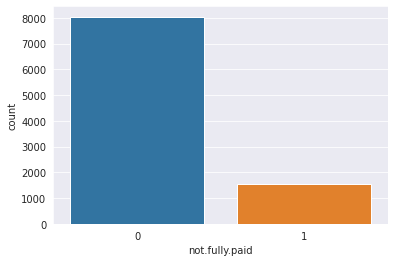

In [6]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

**This dataset is highly imbalanced and includes features that make this problem more challenging. If we do model training with this data, the prediction will be biased since the “not.fully.paid =0 “ has 83.9% filled, and only 16% is the “not.fully.paid=1”**

In [7]:
df1=pd.get_dummies(df, columns=['purpose'])

In [8]:
df1['log.annual.inc'] = np.exp(df1['log.annual.inc'])

In [9]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.000385,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.000073,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.999943,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.000385,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.999636,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


Random over-sampling:
0    8045
1    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

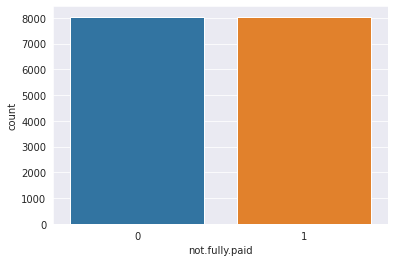

In [10]:
#There were multiple methods to handle imbalanced data.
#The dataset used here is minimal; I chose to try oversampling to balance this dataset.
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

<AxesSubplot:>

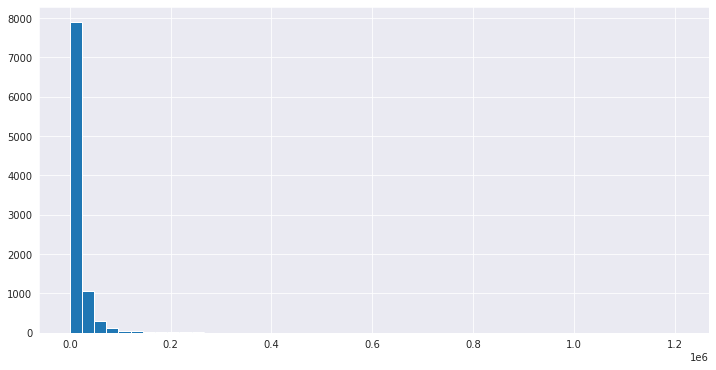

In [11]:
df['revol.bal'].hist(figsize=[12,6], bins=50)

In [12]:
df1=pd.get_dummies(df, columns=['purpose'])

# Exploratory Data Analysis

Text(0.5, 0, 'FICO')

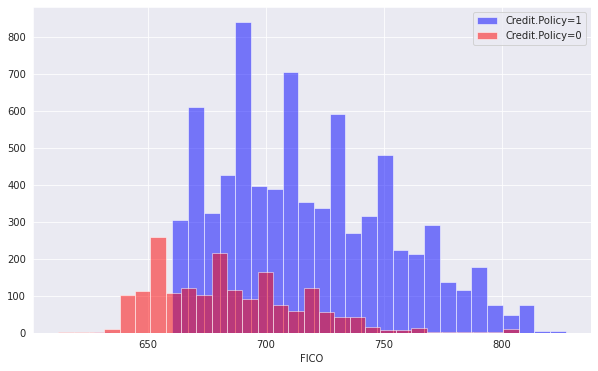

In [13]:
#Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

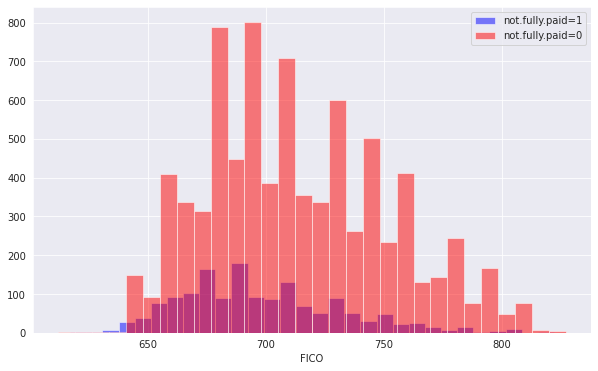

In [14]:
#Let's see a similar chart for “not.fully.paid” column
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

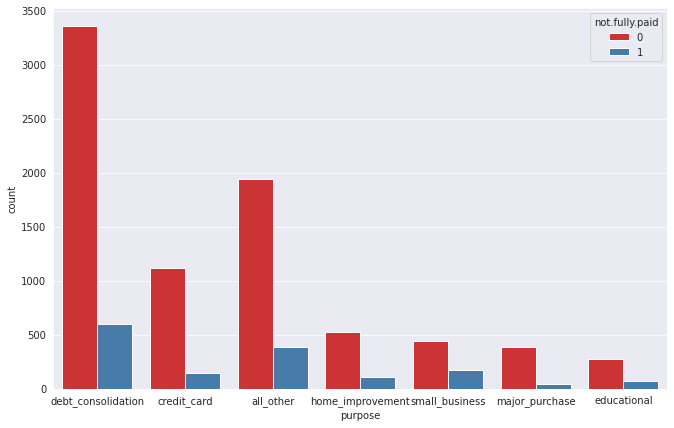

In [15]:
#Now, check the dataset group by loan purpose. Create a countplot with the color hue defined by not.fully.paid
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

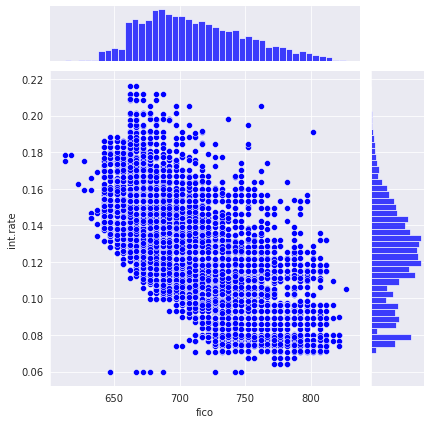

In [16]:
#The next visual we will pull part of EDA in this dataset is the trend between FICO score and interest rate
sns.jointplot(x='fico',y='int.rate',data=df,color='blue')

<Figure size 792x504 with 0 Axes>

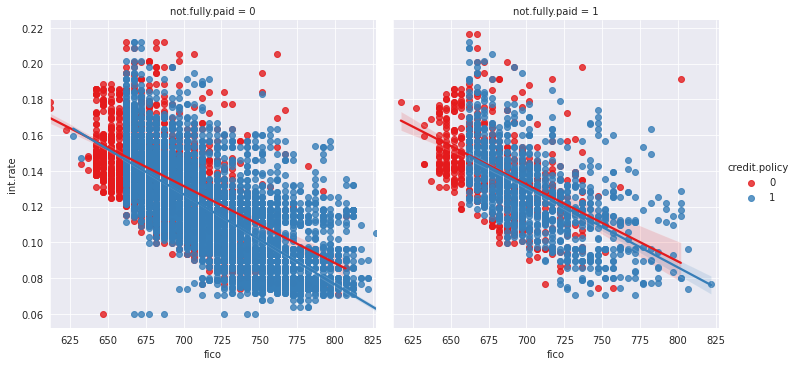

In [17]:
#To compare the trend between not.fully.paid and credit.policy, create seaborn implot
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

**The above visuals gave us an idea of how the data is and what we will work with. Nest step is to prepare the data for model training and test as the first step converts the categorical values to numeric. Here in this dataset “purpose” column is a critical data point for the model as per our analysis above, and it is categorical.**

In [18]:
cat_feats = ['purpose']
final_data = pd.get_dummies(df_test_over,columns=cat_feats,drop_first=True)
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 7142
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


<AxesSubplot:>

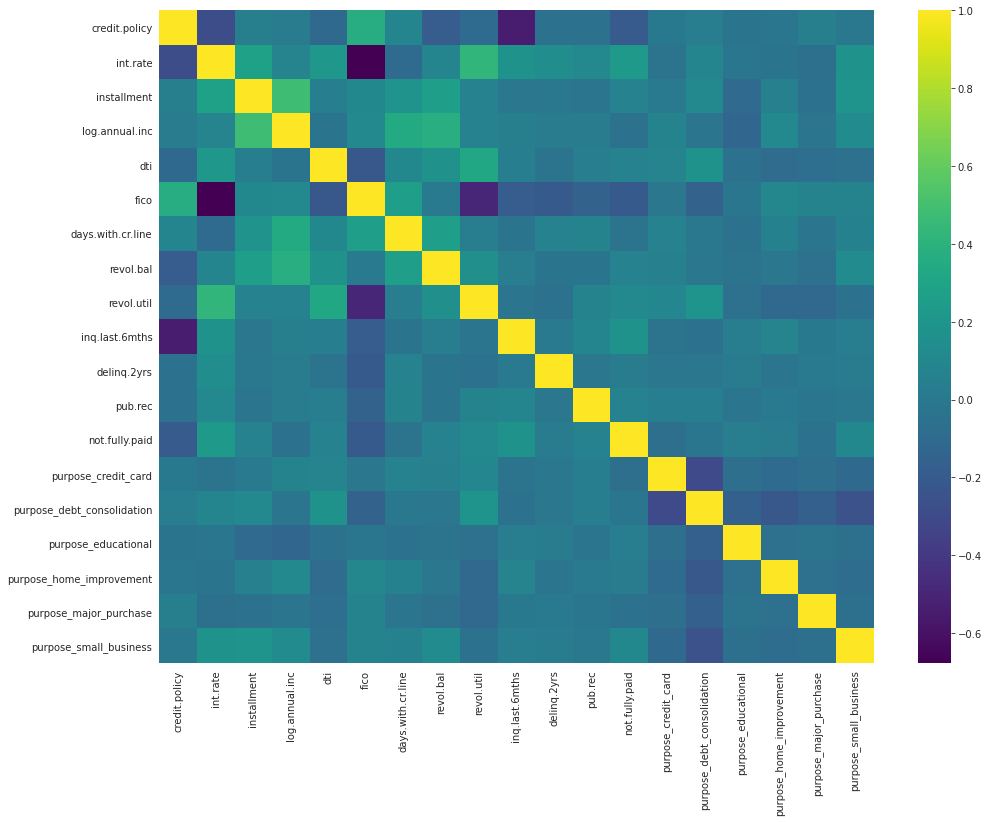

In [19]:
final_data.corr()
plt.figure(
        figsize=[16,12]
)

sns.heatmap(
        data=final_data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

**We only focus on the grids of yellow or very light green. After comparing with the feature description again, I decided to drop:’revol.bal’, ‘days.with.cr.line’, ‘installment’, ‘revol.bal’**


**revol.bal, day.with.cr.line, installment can represent by annual income. revol.util can represent by int.rate.**

In [20]:
to_drop2 = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

final_data.drop(to_drop2, axis=1, inplace=True) 

In [21]:
final_data.isnull().mean()

credit.policy                 0.0
int.rate                      0.0
log.annual.inc                0.0
dti                           0.0
fico                          0.0
revol.util                    0.0
inq.last.6mths                0.0
delinq.2yrs                   0.0
pub.rec                       0.0
not.fully.paid                0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_major_purchase        0.0
purpose_small_business        0.0
dtype: float64

# Modeling:
# Deep Learning Implementation:
**Finally, do the train test split and fit the model with the data shape we created above. since there are 19 features, I chose the first layer of the neural network with 19 nodes.**

In [22]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 16ms/step - loss: 0.6809 - accuracy: 0.5745 - val_loss: 0.6536 - val_accuracy: 0.6161
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6213 - val_loss: 0.6505 - val_accuracy: 0.6132
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.6248 - val_loss: 0.6503 - val_accuracy: 0.6136
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6180 - val_loss: 0.6440 - val_accuracy: 0.6225
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.6322 - val_loss: 0.6438 - val_accuracy: 0.6180
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.6304 - val_loss: 0.6434 - val_accuracy: 0.6223
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.6302 - val_loss: 0.6427 - val_accuracy: 0.6240
Epoch 8/200


# Model Evaluation and Validation

<AxesSubplot:>

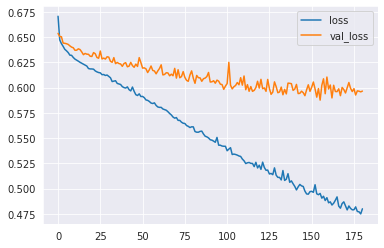

In [23]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() #over fitting 

**This validation result, the Loss plot, shows us the model is overfitted.**

In [24]:
predictions = model.predict_classes(X_test)

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1784  653]
 [ 889 1501]] 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70      2437
           1       0.70      0.63      0.66      2390

    accuracy                           0.68      4827
   macro avg       0.68      0.68      0.68      4827
weighted avg       0.68      0.68      0.68      4827



**The model’s overall f1-score for accuracy is 0.70. Still, there are type 2 errors (889) in the prediction.**

# Model Refinement
**Two ways of refining the model we will try here. Add Dropout layers to bring down the overfitting OR Lower the cut-off line in binary prediction to reduce the Type 2 error, at the cost of increasing Type 1 error. In the LendingClub case, Type 2 error is the more serious problem because it devastates its balance sheet, while Type 1 error is not a very big deal.**

In [25]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 8ms/step - loss: 0.6916 - binary_accuracy: 0.5177 - val_loss: 0.6681 - val_binary_accuracy: 0.6165
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6698 - binary_accuracy: 0.5884 - val_loss: 0.6538 - val_binary_accuracy: 0.6184
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6584 - binary_accuracy: 0.6038 - val_loss: 0.6516 - val_binary_accuracy: 0.6134
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6554 - binary_accuracy: 0.6036 - val_loss: 0.6491 - val_binary_accuracy: 0.6182
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6512 - binary_accuracy: 0.6197 - val_loss: 0.6484 - val_binary_accuracy: 0.6134
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6560 - binary_accuracy: 0.6130 - val_loss: 0.6473 - val_binary_accuracy: 0.6120
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - los

<AxesSubplot:>

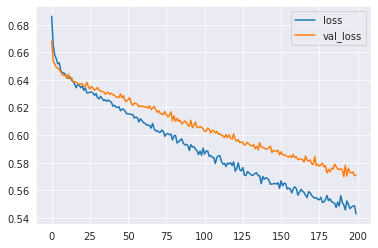

In [26]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot()

**The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model.**

In [27]:
predictions_new = (model_new.predict_proba(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

[[ 490 1947]
 [  28 2362]] 
               precision    recall  f1-score   support

           0       0.95      0.20      0.33      2437
           1       0.55      0.99      0.71      2390

    accuracy                           0.59      4827
   macro avg       0.75      0.59      0.52      4827
weighted avg       0.75      0.59      0.52      4827



/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


**By changing the cut-off line to 0.2 (default is 0.5), we have dramatically brought down the Type 2 error.**

In [28]:
#Save the model and scalar
dump(scaler, open('scaler.pkl', 'wb'))
model_new.save('my_model_lending_club.h5')

# Model Use Case
We will use the model on “not.fully.paid = 0” records; when these loans are matured, we will get it as the Out-Of-Time sample validation results.

In [29]:
later_scaler = load(open('scaler.pkl', 'rb'))
later_model = load_model('my_model_lending_club.h5')

X_OOT = to_pred.drop('not.fully.paid', axis=1).values
to_pred.drop('not.fully.paid', axis=1).values

print(X_OOT.shape)

(0, 15)
